In [64]:
import keras
from keras import backend as k 
from keras.models import Sequential 
from keras.layers import Activation 
from keras.layers.core import Dense 
from keras.optimizers import Adam 
from keras.applications import VGG16

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

%matplolib inline

ERROR:root:Line magic function `%matplolib` not found.


In [65]:
train_path='data/train'
valid_path='data/valid'
test_path='data/test'

In [128]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog','cat'],batch_size=30)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog','cat'],batch_size=12)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog','cat'],batch_size=60,shuffle = False, pickle_safe =True, workers =1 )

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [67]:
def plot_byepoch_performance(num_epoch):
    train_loss=hist.history['loss']
    val_loss=hist.history['val_loss']
    train_acc=hist.history['acc']
    val_acc=hist.history['val_acc']
    xc=range(num_epoch)

    plt.figure(1,figsize=(7,5))
    plt.plot(xc,train_loss)
    plt.plot(xc,val_loss)
    plt.xlabel('num of Epochs')
    plt.ylabel('loss')
    plt.title('train_loss vs val_loss')
    plt.grid(True)
    plt.legend(['train','val'])
    #print plt.style.available # use bmh, classic,ggplot for big pictures
    #plt.style.use(['classic'])

    plt.figure(2,figsize=(7,5))
    plt.plot(xc,train_acc)
    plt.plot(xc,val_acc)
    plt.xlabel('num of Epochs')
    plt.ylabel('accuracy')
    plt.title('train_acc vs val_acc')
    plt.grid(True)
    plt.legend(['train','val'],loc=4)
    #print plt.style.available # use bmh, classic,ggplot for big pictures
    plt.style.use(['bmh'])

In [68]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [69]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues): 

    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title) 
    plt.colorbar() 
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45) 
    plt.yticks(tick_marks, classes) 
    if normalize: 
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        print("Normalized confusion matrix") 
    else: 
        print('Confusion matrix, without normalization') 
    print(cm) 
    thresh = cm.max() / 2. 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black") 
    plt.tight_layout() 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label') 

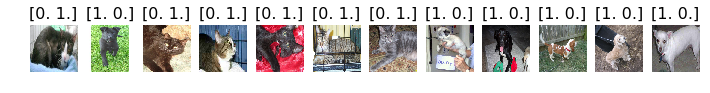

In [111]:
imgs, labels = next(valid_batches)
plots(imgs,titles=labels)

In [13]:
imgs.shape

(30, 224, 224, 3)

In [14]:
model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)), 
                    Flatten(), 
                    Dense(2, activation='softmax')]) 

In [45]:
model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
model.fit_generator(train_batches, steps_per_epoch=5, validation_data=valid_batches, validation_steps=5, epochs=5, verbose=2) 

Epoch 1/5
 - 22s - loss: 7.4143 - acc: 0.5400 - val_loss: 8.2202 - val_acc: 0.4900
Epoch 2/5
 - 20s - loss: 8.6393 - acc: 0.4640 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 3/5
 - 20s - loss: 7.9946 - acc: 0.5040 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 4/5
 - 20s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 5/5
 - 20s - loss: 8.3492 - acc: 0.4820 - val_loss: 7.7367 - val_acc: 0.5200


In [153]:
test_images,test_labels=next(test_batches)
test_labels=test_labels[:,0]

In [104]:
test_predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [105]:
test_predictions[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [107]:
cm = confusion_matrix(test_labels, predictions[:,0])
cm

array([[4, 0],
       [6, 0]], dtype=int64)

Confusion matrix, without normalization
[[4 0]
 [6 0]]


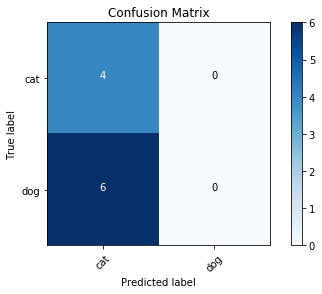

In [108]:
cm_plot_labels = ['cat','dog'] 
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix') 

In [70]:
VGG16_model=keras.applications.vgg16.VGG16()
VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [71]:
print(type(VGG16_model),type(model))

<class 'keras.engine.training.Model'> <class 'keras.models.Sequential'>


In [73]:
x = VGG16_model.get_layer('fc2').output
#x = Dropout(0.3)(x)
#x = Dense(1024, activation="relu",name='new_fc2')(x)
#x = Dropout(0.3)(x)
#x = Dense(512, activation="relu",name='new_fc3')(x)
predictions = Dense(2, activation="softmax")(x)

tuned_VGG16_model= Model(VGG16_model.inputs, predictions)

for layer in tuned_VGG16_model.layers[:-1]:
        layer.trainable = False
        tuned_VGG16_model.layers[17].trainable
tuned_VGG16_model.summary()  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [74]:
tuned_VGG16_model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
hist=tuned_VGG16_model.fit_generator(train_batches, steps_per_epoch=15, validation_data=valid_batches, validation_steps=5, epochs=3, verbose=1) 

Epoch 1/3
15/15 [==============================] - 433s 29s/step - loss: 0.4510 - acc: 0.8467 - val_loss: 0.1478 - val_acc: 0.9167
Epoch 2/3
15/15 [==============================] - 440s 29s/step - loss: 0.2110 - acc: 0.9356 - val_loss: 0.1795 - val_acc: 0.9000
Epoch 3/3
15/15 [==============================] - 413s 28s/step - loss: 0.0672 - acc: 0.9733 - val_loss: 0.4178 - val_acc: 0.9167


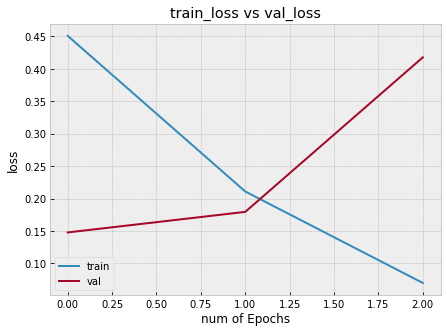

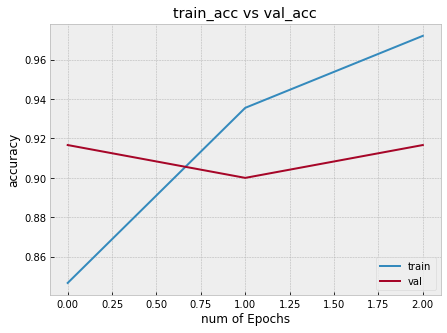

In [78]:
plot_byepoch_performance(3)

In [138]:
test_images,test_labels=next(test_batches)
test_labels=test_labels[:,0]

In [168]:
test_images[0].shape
input_img_resize=np.reshape(test_images[0],(1,224,224,3))
input_img_resize.shape

(1, 224, 224, 3)

In [142]:
test_VGG16_predictions=tuned_VGG16_model.predict_generator(test_batches, steps=1, verbose=0)
len(test_VGG16_predictions[:,0])

60

In [143]:
cm_VGG16 = confusion_matrix(test_labels, np.round(test_VGG16_predictions[:,0]))
cm_VGG16

array([[30,  0],
       [ 4, 26]], dtype=int64)

Confusion matrix, without normalization
[[30  0]
 [ 4 26]]


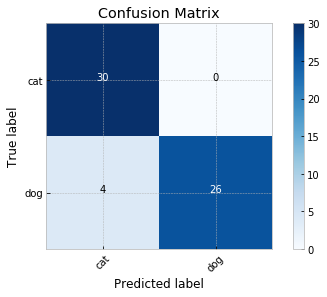

In [144]:
cm_plot_labels = ['cat','dog'] 
plot_confusion_matrix(cm_VGG16, cm_plot_labels, title='Confusion Matrix') 

In [145]:
test_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [146]:
np.round(test_VGG16_predictions[:,0])

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [147]:
errors = np.where(test_labels != np.round(test_VGG16_predictions[:,0]))[0]
print("No of errors = {}/{}".format(len(errors),60))

No of errors = 4/60


In [148]:
correct = np.where(test_labels == np.round(test_VGG16_predictions[:,0]))[0]
print("No of errors = {}/{}".format(len(correct),60))

No of errors = 56/60


In [149]:
len(errors)

4

In [150]:
fnames = test_batches.filenames
ground_truth = test_batches.classes
label2index = test_batches.class_indices
idx2label = dict((v,k) for k,v in label2index.items())

0 6
Actual : dog, Predicted : cat


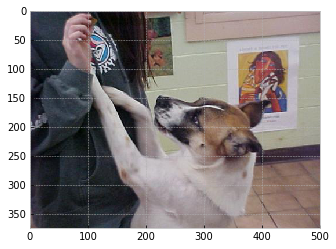

1 14
Actual : dog, Predicted : cat


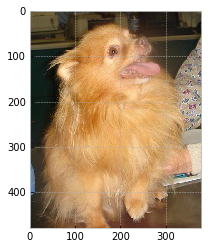

2 16
Actual : dog, Predicted : cat


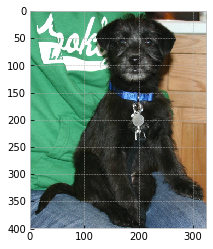

3 19
Actual : dog, Predicted : cat


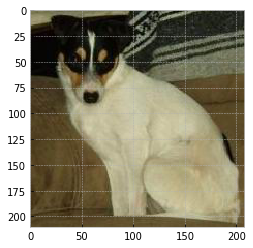

In [153]:
for i in range(len(errors)):
    print(i,errors[i])
    pred_class = np.argmax(test_VGG16_predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    print('Actual : {}, Predicted : {}'.format(fnames[errors[i]].split('\\')[0],pred_label))
    original = load_img('{}/{}'.format(test_path,fnames[errors[i]]))
    plt.imshow(original)
    plt.show()

(1, 1, 112, 112, 64)
(112, 112, 64)
(112, 112, 64)


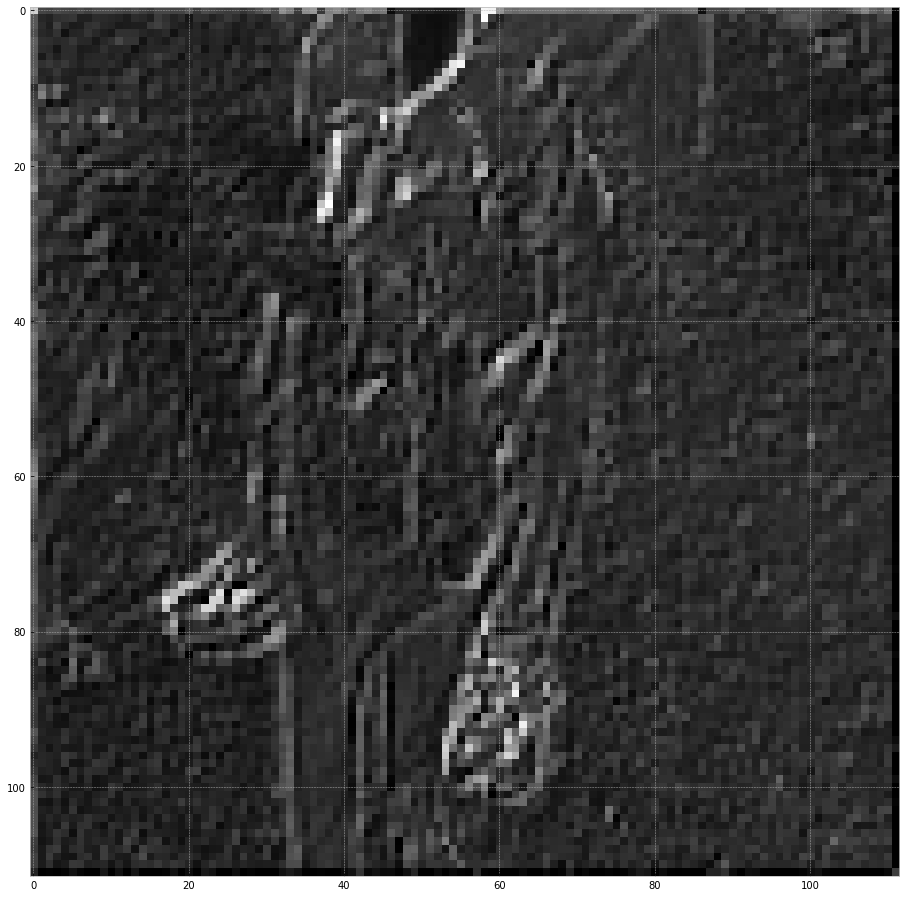

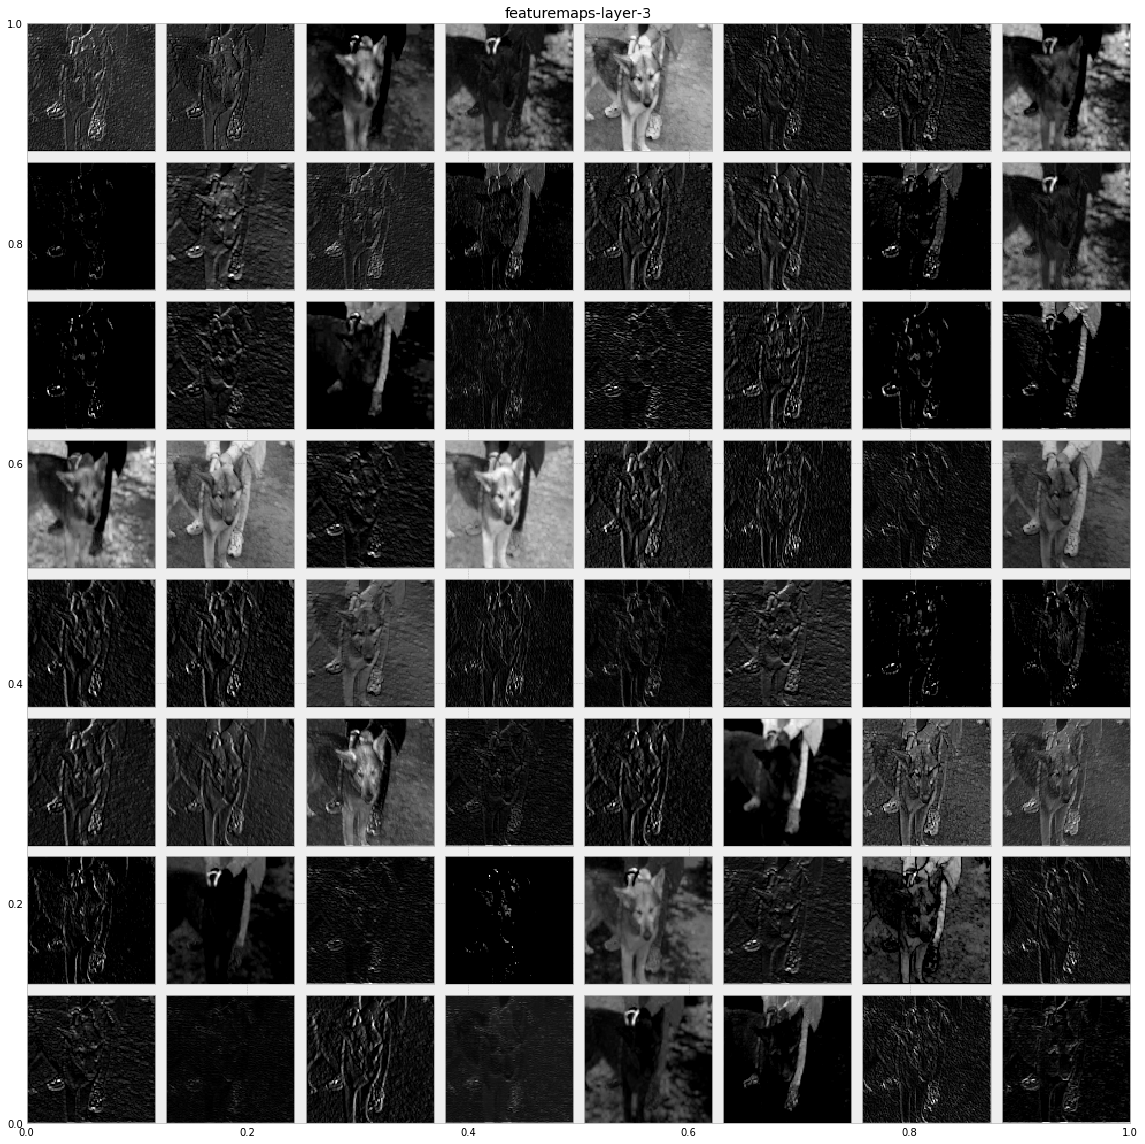

In [169]:
def get_featuremaps(model, layer_idx, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
    activations = get_activations([X_batch,0])
    return activations

layer_num=3
filter_num=0

activations = get_featuremaps(tuned_VGG16_model, int(layer_num),input_img_resize)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

if K.image_dim_ordering()=='th':
    feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(feature_maps[:,:,i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')